In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

869


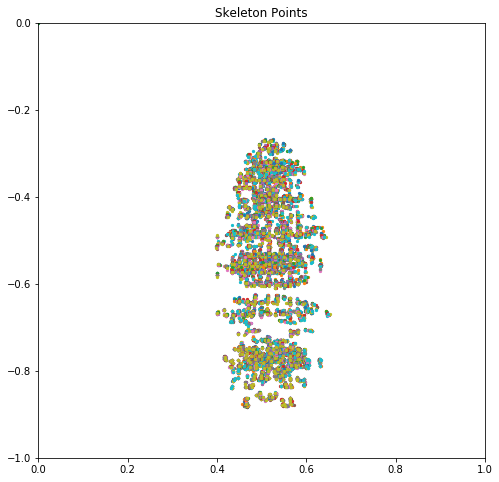

In [2]:
BASE_DIR = "D:\openpose-1.5.0-binaries-win64-gpu-python-flir-3d_recommended\openpose-1.5.0-binaries-win64-gpu-python-flir-3d_recommended\DatasetPosePerDancer\Demi-Plie"

#run through each dancer folder and plot the coordinates
count = 0
def plotCoordinates():
    fig, ax = plt.subplots(1, figsize=(8,8))
    plt.title('Skeleton Points')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global count
    for subdir, dirs, files in os.walk(BASE_DIR):
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(BASE_DIR,subdir,file)
                #print(file_path)
                raw_img_json = pd.read_json(file_path)
                img_keypoints_list = raw_img_json.people[0]['pose_keypoints_2d']
                x = img_keypoints_list[0::3]
                posY = img_keypoints_list[1::3]
                y = [-y for y in posY]
                sc = ax.scatter(x,y, s=5)
                count+=1
plotCoordinates()
print(count)

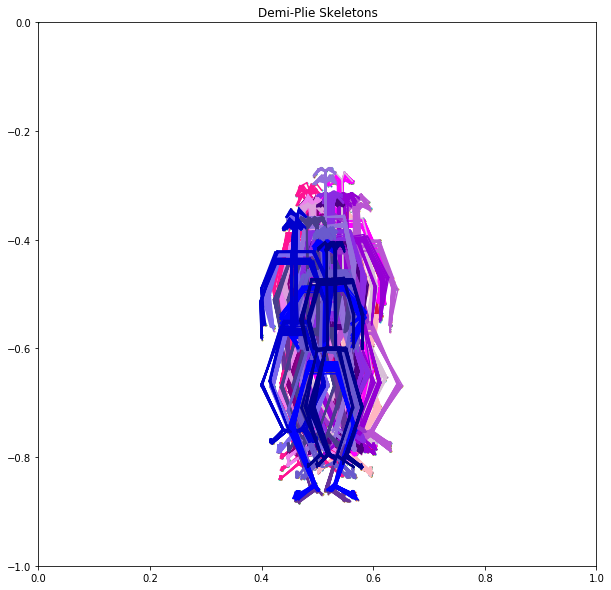

In [4]:
bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
penColor = ['lightpink','pink','crimson','palevioletred','lavenderblush','hotpink','deeppink','mediumvioletred','orchid','magenta','fuchsia','darkmagenta','purple','violet','plum','thistle','mediumorchid','darkviolet','darkorchid','indigo','blueviolet','rebeccapurple','mediumpurple','mediumslateblue','darkslateblue','slateblue','blue','mediumblue','darkblue','navy']
allXList =[]
allYList = []
dancerNum = 0
def plotSkeletons():
    fig,ax = plt.subplots(1,figsize = (10,10))
    plt.title('Demi-Plie Skeletons')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global dancerNum
    for subdir, dirs, files in os.walk(BASE_DIR):
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(BASE_DIR,subdir,file)
                raw_img_json = pd.read_json(file_path)
                img_keypoints_list = raw_img_json.people[0]['pose_keypoints_2d']
                x = img_keypoints_list[0::3]
                allXList.append(x)
                posY = img_keypoints_list[1::3]
                y = [-y for y in posY]
                allYList.append(y)
                sc = ax.scatter(x,y, s=1)
                for bone in bones:
                    #Remove the 0,0 xy coordinates plotting
                    if((x[bone[0]]==0 and y[bone[0]]==0) or(x[bone[1]]==0 and y[bone[1]]==0)):
                        #print("zero values for joint: ",x.index(x[bone[0]]))
                        #print("zero values for joint: ",x.index(x[bone[1]]))
                        continue
                    #ax.plot([x_values],[y_values])
                    #if(dancerNum !=17):
                    ax.plot([x[bone[0]],x[bone[1]]],[y[bone[0]],y[bone[1]]],penColor[dancerNum-1])
        dancerNum+=1
plotSkeletons()


In [5]:
np.save('allDemiPlieXList.npy', allXList)
np.save('allDemiPlieYList.npy', allYList)

In [6]:
xloaded = np.load('allXList.npy')
print(xloaded)
print(len(xloaded))
yloaded = np.load('allYList.npy')
print(yloaded)
print(len(yloaded))

[[0.629939 0.607424 0.591083 ... 0.580965 0.576767 0.548273]
 [0.629978 0.611405 0.595074 ... 0.580921 0.576751 0.550301]
 [0.62986  0.611461 0.595085 ... 0.582942 0.576795 0.550244]
 ...
 [0.6054   0.58088  0.558367 ... 0.556376 0.548147 0.52364 ]
 [0.599218 0.578817 0.550219 ... 0.558366 0.548169 0.523654]
 [0.597205 0.578814 0.550253 ... 0.317327 0.31939  0.352086]]
870
[[-0.352578 -0.417869 -0.407139 ... -0.813033 -0.818384 -0.818391]
 [-0.352583 -0.420686 -0.415202 ... -0.81562  -0.818441 -0.818526]
 [-0.347098 -0.420663 -0.412498 ... -0.815621 -0.818455 -0.818448]
 ...
 [-0.404346 -0.467083 -0.467046 ... -0.84027  -0.845778 -0.851149]
 [-0.404201 -0.466982 -0.466856 ... -0.840318 -0.848424 -0.851147]
 [-0.404264 -0.467029 -0.466901 ... -0.524205 -0.518709 -0.543309]]
870


In [7]:
# Now calculate mean skeleton:
sumXList = [sum(i) for i in zip(*allXList)]# the * indicates the use of iterables
sumYList = [sum(j) for j in zip(*allYList)]
print(sumXList)
print(sumYList)

#Get the average: sum/count
avgXList = [sx / count for sx in sumXList]
avgYList = [sy / count for sy in sumYList]
print(avgXList)
print(avgYList)

[447.9832960000002, 448.4049100000001, 418.60526200000004, 397.5873209999999, 406.0889210000002, 477.8489099999999, 499.1062829999999, 494.70268700000037, 449.6587429999997, 429.584722, 402.96439899999996, 437.057571, 469.80539800000054, 498.5822980000003, 466.9255979999997, 441.38332399999996, 454.3512299999998, 432.7800969999997, 463.2752009999998, 491.5420710000004, 488.93298300000055, 459.79833299999956, 413.83458900000005, 414.0979689999996, 443.72411200000056]
[-305.2436420000003, -366.1381870000004, -366.3468460000001, -431.3392889999998, -484.6273569999998, -365.40778299999954, -428.77023600000035, -483.20769899999976, -489.21543499999984, -489.6352859999995, -584.4655470000004, -666.7583600000013, -488.8860279999997, -582.586861, -666.6155250000003, -298.7319169999998, -298.233674, -308.3627570000001, -307.53433399999966, -687.9532910000006, -679.6865789999986, -673.231423, -688.3290430000003, -682.3155179999995, -673.2793770000003]
[0.5155158757192178, 0.5160010471806675, 0.4

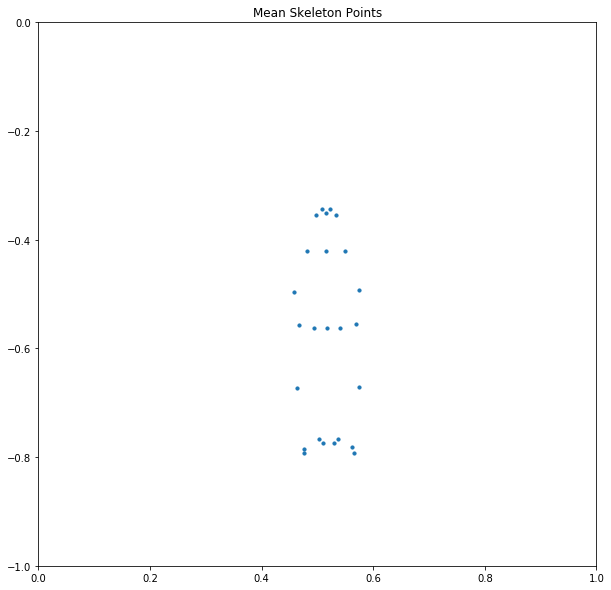

In [8]:
bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
#Plot mean skeleton:
def plotMeanCoordinates():
    fig, ax = plt.subplots(1, figsize=(10,10))
    plt.title('Mean Skeleton Points')
    plt.xlim(0, 1)
    plt.ylim(-1, 0)
    sc = ax.scatter(avgXList,avgYList, s=10)
    #for bone in bones:
        #if avgXList[bone[0]]== 0.0 or avgYList[bone[0]] == 0.0  or avgXList[bone[1]] == 0.0 or avgYList[bone[1]] == 0.0:
            #print("zero values for joint: ",avgXList.index(avgXList[bone[0]]))
            #print("zero values for joint: ",avgXList.index(avgXList[bone[1]]))
            
        #ax.plot([avgXList[bone[0]],avgXList[bone[1]]],[avgYList[bone[0]],avgYList[bone[1]]])
plotMeanCoordinates()

In [9]:
#calculation of standard deviation values:
import statistics


In [10]:
standardDeviationX = [statistics.stdev(i) for i in zip(*allXList)]
standardDeviationY = [statistics.stdev(i) for i in zip(*allYList)]

print("Standard Deviations of X values:",standardDeviationX)
print("Standard Deviations of Y values:",standardDeviationY) 

Standard Deviations of X values: [0.025192560207883883, 0.025421776255643725, 0.025026223397224566, 0.025285184496981965, 0.02572159773377318, 0.026328745056603334, 0.028485373213894813, 0.02800229678771828, 0.025564311182375263, 0.025131025659982445, 0.02375759737224073, 0.025521240051464243, 0.026158161020804843, 0.029306996766636173, 0.02608875120881017, 0.025491519476288596, 0.02580311959029772, 0.025014940411106586, 0.025714882823193612, 0.027881364901646534, 0.04279884814854223, 0.025498424323799118, 0.02558852722807017, 0.025979395278001177, 0.02577096498439462]
Standard Deviations of Y values: [0.03381867107597101, 0.03127332220654897, 0.031081321486836008, 0.028790991173621144, 0.030390743707970683, 0.03133551293390876, 0.02923480302923067, 0.03197731157052452, 0.029933091571192123, 0.029575216480165586, 0.028592515611546153, 0.03177218974296696, 0.030126217276098856, 0.029296777185092555, 0.03160621807971576, 0.033581910656188374, 0.03392408349007957, 0.033911172851614345, 0.

In [12]:
print(len(standardDeviationX))
print(len(avgXList))

25
25


In [13]:
np.save('Demi-PlieStdDevX.npy', standardDeviationX)
np.save('Demi-PlieStdDevY.npy', standardDeviationY)
np.save('Demi-PlieMeanX.npy', avgXList)
np.save('Demi-PlieMeanY.npy', avgYList)